In [1]:
import sys
sys.path.append("../ml_models/")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

from sklearn.datasets import make_blobs

from gmm import GMM

%load_ext autoreload
%autoreload 2

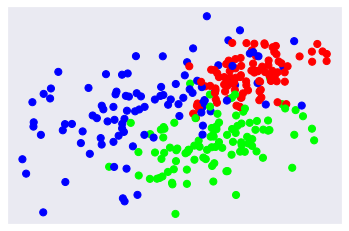

In [2]:
X, y_true = make_blobs(
    n_samples=300, centers=3,
    cluster_std=[1, 1.5, 2],
    random_state=0
)

theta = np.radians(30)
t = np.tan(theta)
shear_x = np.array(((1, t), (0, 1))).T
X = X @ shear_x
plt.scatter(X[:, 0], X[:, 1], s=50, c=np.eye(3)[y_true])
plt.xticks([])
plt.yticks([])
plt.show()

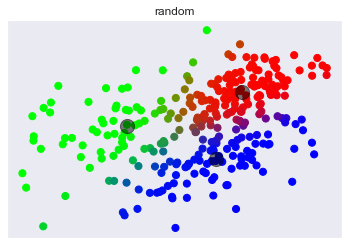

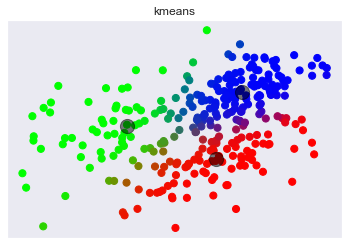

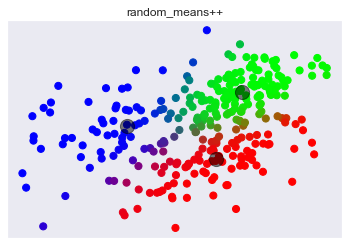

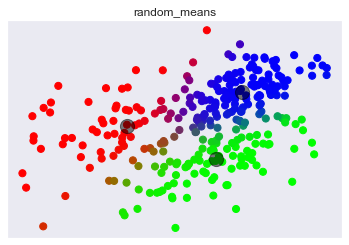

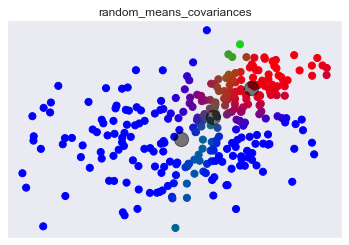

In [3]:
for init in [
    'random', 'kmeans', 'random_means++', 'random_means', 'random_means_covariances'
]:
    gmm = GMM(init=init, k=3)
    gmm.fit(X)
    plt.title(init)
    pred = gmm.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], c=pred, s=50)
    centers = gmm.means
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()